In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-jobs/DataAnalyst.csv


In [2]:
Dataset contains more than 2000 job listing for data analyst positions, with different Job Title names such as:

Target:
Job Title(Diff data analyst)
Salary
Loction(City/State)
Rating


SyntaxError: invalid syntax (<ipython-input-2-60a3dc81d544>, line 1)

In [3]:
# Data Manuplation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import re

%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('../input/data-analyst-jobs/DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
df.shape

(2253, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [7]:
df.values

array([[0, 'Data Analyst, Center on Immigration and Justice (CIJ)',
        '$37K-$66K (Glassdoor est.)', ..., '$100 to $500 million (USD)',
        '-1', 'True'],
       [1, 'Quality Data Analyst', '$37K-$66K (Glassdoor est.)', ...,
        '$2 to $5 billion (USD)', '-1', '-1'],
       [2,
        'Senior Data Analyst, Insights & Analytics Team [Customer Operations]',
        '$37K-$66K (Glassdoor est.)', ..., 'Unknown / Non-Applicable',
        'GoDaddy', '-1'],
       ...,
       [2250, 'Technical Business Analyst (SQL, Data analytics, ETL)',
        '$78K-$104K (Glassdoor est.)', ..., '-1', '-1', '-1'],
       [2251, 'Data Analyst 3, Customer Experience',
        '$78K-$104K (Glassdoor est.)', ..., '$25 to $50 million (USD)',
        '-1', '-1'],
       [2252, 'Senior Quality Data Analyst',
        '$78K-$104K (Glassdoor est.)', ..., '$2 to $5 billion (USD)',
        'Centura Health, HealthONE, Denver Health and Hospital Authority',
        '-1']], dtype=object)

In [8]:
# Dropping Columns from DataFrame
df.drop(['Unnamed: 0','Job Description',"Company Name",'Headquarters', 'Size', 'Founded','Type of ownership','Revenue','Competitors','Easy Apply'], 1,  inplace=True)

In [9]:
# Renaming Column names
df.rename(columns={ "Job Title":"Job_Title", 
                  "Salary Estimate": "Salary_Estimate"}, inplace=True)


In [10]:
df.head()

,Job_Title,Salary_Estimate,Rating,Location,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,"New York, NY",Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,"New York, NY",Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,"New York, NY",Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,"New York, NY",IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,"New York, NY",Sports & Recreation,"Arts, Entertainment & Recreation"


Data Preparation

In [11]:
# Splitting  Job_Title into understandable
split_Job_Title= df.Job_Title.str.split(' -|—|, ', expand= True)

split_Job_Title

,0,1,2,3,4,5
0,Data Analyst,Center on Immigration and Justice (CIJ),None,None,None,None
1,Quality Data Analyst,None,None,None,None,None
2,Senior Data Analyst,Insights & Analytics Team [Customer Operations],None,None,None,None
3,Data Analyst,None,None,None,None,None
4,Reporting Data Analyst,None,None,None,None,None
...,...,...,...,...,...,...
2248,RQS,IHHA,201900004460,1q Data Security Analyst,None,None
2249,Senior Data Analyst (Corporate Audit),None,None,None,None,None
2250,Technical Business Analyst (SQL,Data analytics,ETL),None,None,None
2251,Data Analyst 3,Customer Experience,None,None,None,None


In [12]:
# Cleaned Job_Title column
split_Job_Title = split_Job_Title.replace({'Data Analyst 2': 'Data Analyst II',
                                           'Data Analyst 3': 'Data AnalystIII',
                                           'RQS': 'Data Security Analyst',
                                           'JPSC-7176':'Senior Data Analyst',
                                           'Data Analyst *Temp-Hire*':'Data Analyst',
                                           'Data Analyst-IT II':'Data Analyst II',
                                           'IT Data Analyst':'Data Analyst',
                                           'CCB Risk':'Fraud Risk Data Analyst','Analyst':'Analyst Data Intelligence',
                                           'CDHP': 'Data Analyst Team Lead','ACA':'Data Analyst','VP':'Research Project Analyst/Data Management',
                                           'JPSC-8461':'Data Analyst','.net': 'Business Analyst\Data Analyst','.Net Developer':'Data Design Analyst',
                                           "Technical Business Analyst (SQL": 'Technical Business Analyst (SQL Data analytics ETL)',
                                           'Data Systems Analyst (7199U':'Data Systems Analyst',
                                            'Sr. Data Analyst': 'Senior Data Analyst', 
                                            'Sr Data Analyst': 'Senior Data Analyst',
                                            'Data Analyst Junior': 'Junior Data Analyst',
                                          '#104252 Division Data and Financial Analyst': 'Data and Finanical Analyst',
                                            '#105009 Research Data Analyst':'Research Data Analyst',
                                           '(Data Analyst) BA/BSA':'Data Analyst','(REMOTE) Sr. Risk Analyst (IT}':'Senior Risk Analyst',
                                           '(Risk Data Analyst)':"Risk Data Analyst",'(Data Risk Analyst: Data Modeler)':'Risk Data Analyst'})

In [13]:
# Salary Column Cleaning
df['Salary_Estimate'] = df['Salary_Estimate'].apply(lambda x: '$0K-$0K' if x == '-1' else x)
df['Salary_Estimate'] = df['Salary_Estimate'].apply(lambda x: x.split('(')[0])

salary= df['Salary_Estimate'].str.split('-', expand=True)
df['MinSalary($/k)'] = pd.to_numeric(salary[0].str.extract('(\d+)', expand=False))
df['MaxSalary($/k)'] = pd.to_numeric(salary[1].str.extract('(\d+)', expand=False))

df.head()

,Job_Title,Salary_Estimate,Rating,Location,Industry,Sector,MinSalary($/k),MaxSalary($/k)
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,3.2,"New York, NY",Social Assistance,Non-Profit,37,66
1,Quality Data Analyst,$37K-$66K,3.8,"New York, NY",Health Care Services & Hospitals,Health Care,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,3.4,"New York, NY",Internet,Information Technology,37,66
3,Data Analyst,$37K-$66K,4.1,"New York, NY",IT Services,Information Technology,37,66
4,Reporting Data Analyst,$37K-$66K,3.9,"New York, NY",Sports & Recreation,"Arts, Entertainment & Recreation",37,66


In [14]:
#df.drop(['Salary_Estimate',"MinSalary",'MaxSalary','MinSalary($)'],axis=1,inplace=True)
df.drop(['Salary_Estimate'],axis=1,inplace=True)

In [15]:
# Industry Column Cleaning
df['Industry'] = df['Industry'].apply(lambda x: 'NAN' if x == '-1' else x)
df['Industry'].value_counts().head()

NAN                                 353
IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Computer Hardware & Software        111
Name: Industry, dtype: int64

In [16]:
# Sector column Cleaning
df['Sector'] = df['Sector'].apply(lambda x: 'NAN' if x == '0' else x)
df['Sector'].value_counts().head()

Information Technology    570
Business Services         524
-1                        353
Finance                   169
Health Care               151
Name: Sector, dtype: int64

In [17]:
# split into state & City
split_Location= df.Location.str.split(',',expand=True)
split_Location

,0,1,2
0,New York,NY,None
1,New York,NY,None
2,New York,NY,None
3,New York,NY,None
4,New York,NY,None
...,...,...,...
2248,Denver,CO,None
2249,Centennial,CO,None
2250,Denver,CO,None
2251,Centennial,CO,None


In [18]:
# Assign Coulmn names
split_Location.columns=['City','State','None']

split_Location

,City,State,None
0,New York,NY,None
1,New York,NY,None
2,New York,NY,None
3,New York,NY,None
4,New York,NY,None
...,...,...,...
2248,Denver,CO,None
2249,Centennial,CO,None
2250,Denver,CO,None
2251,Centennial,CO,None


In [19]:
# Adding columns to our output DataFrame
df= pd.concat([df, split_Location,split_Job_Title], axis = 1)

In [20]:
df.head()

,Job_Title,Rating,Location,Industry,Sector,MinSalary($/k),MaxSalary($/k),City,State,None,0,1,2,3,4,5
0,"Data Analyst, Center on Immigration and Justic...",3.2,"New York, NY",Social Assistance,Non-Profit,37,66,New York,NY,None,Data Analyst,Center on Immigration and Justice (CIJ),None,None,None,None
1,Quality Data Analyst,3.8,"New York, NY",Health Care Services & Hospitals,Health Care,37,66,New York,NY,None,Quality Data Analyst,None,None,None,None,None
2,"Senior Data Analyst, Insights & Analytics Team...",3.4,"New York, NY",Internet,Information Technology,37,66,New York,NY,None,Senior Data Analyst,Insights & Analytics Team [Customer Operations],None,None,None,None
3,Data Analyst,4.1,"New York, NY",IT Services,Information Technology,37,66,New York,NY,None,Data Analyst,None,None,None,None,None
4,Reporting Data Analyst,3.9,"New York, NY",Sports & Recreation,"Arts, Entertainment & Recreation",37,66,New York,NY,None,Reporting Data Analyst,None,None,None,None,None


In [21]:
df.drop(['Job_Title','Location','None',1,2,3,4,5],1, inplace= True)

In [22]:
# Rename Job_title after cleaning
df.rename(columns={0:'Job_Title'}, inplace=True)

In [23]:

df.head()

,Rating,Industry,Sector,MinSalary($/k),MaxSalary($/k),City,State,Job_Title
0,3.2,Social Assistance,Non-Profit,37,66,New York,NY,Data Analyst
1,3.8,Health Care Services & Hospitals,Health Care,37,66,New York,NY,Quality Data Analyst
2,3.4,Internet,Information Technology,37,66,New York,NY,Senior Data Analyst
3,4.1,IT Services,Information Technology,37,66,New York,NY,Data Analyst
4,3.9,Sports & Recreation,"Arts, Entertainment & Recreation",37,66,New York,NY,Reporting Data Analyst


> > **Top 20 Job Titles**

In [24]:
popular_titles= df['Job_Title'].value_counts().nlargest(n=20)
#popular_titles= popular_titles[popular_titles==True]
#popular_titles.plot()
popular_titles

Data Analyst                 527
Senior Data Analyst          166
Junior Data Analyst           48
Business Data Analyst         35
Data Analyst II               25
Data Quality Analyst          19
Lead Data Analyst             19
Financial Data Analyst        18
Data Governance Analyst       16
Analyst Data Intelligence     15
Data Reporting Analyst        14
Data Analyst I                14
Marketing Data Analyst        12
Data Analyst III              11
Senior Analyst                11
Data Management Analyst       10
Data Warehouse Analyst         9
Business Analyst               9
Data Security Analyst          9
Technical Data Analyst         8
Name: Job_Title, dtype: int64

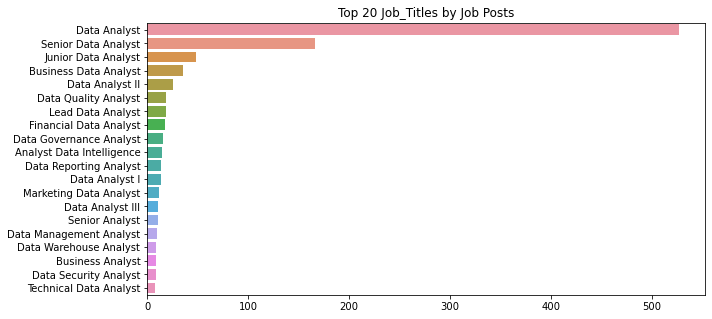

In [25]:
plt.figure(figsize=(10,5))

ax=sns.barplot(x=df['Job_Title'].value_counts()[0:20],y=df['Job_Title'].value_counts()[0:20].index)
plt.title('Top 20 Job_Titles by Job Posts')
plt.ylabel('')
plt.xlabel('')
plt.show()

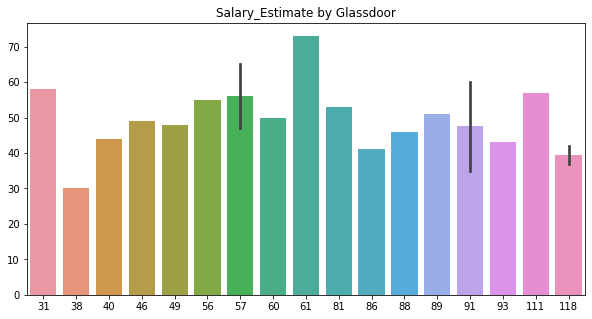

In [26]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df['MinSalary($/k)'].value_counts()[0:20],y=df['MinSalary($/k)'].value_counts()[0:20].index)
plt.title('Salary_Estimate by Glassdoor')
plt.ylabel('')
plt.xlabel('')
plt.show()

Bar plot gives us an estimate of central tendency for a numeric variable (height of each rectangle) and an indication of the 

uncertainty around that estimate (error bars in black).

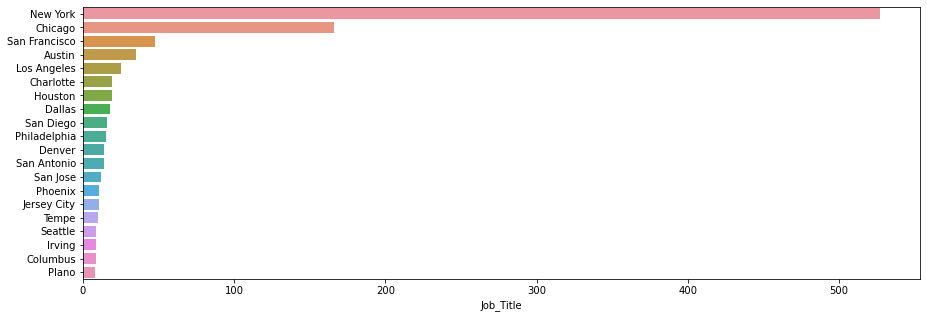

In [27]:
 #Transform into categorical
df['Job_Title'] = pd.Categorical(df['Job_Title'])
df.dtypes
# Plot bar plot (titles, age and sex)
plt.figure(figsize=(15,5))
ax=sns.barplot(x=df['Job_Title'].value_counts()[0:20],y=df['City'].value_counts()[0:20].index)


In [28]:
Sector = df.groupby(['Sector']).mean()

fig = go.Figure()

fig.add_trace(go.Bar(x=Sector.index,y=Sector['MinSalary($/k)'],name='Mininum Mean Salary',text=Sector['MinSalary($/k)'],textposition='auto' ))
fig.add_trace(go.Bar(x=Sector.index,y=Sector['MaxSalary($/k)'],name='Maximum Mean Salary',text=Sector['MinSalary($/k)'],textposition='auto'))
fig.update_layout(title='Mean Salary',barmode='stack')
fig.show()

In [29]:
location = df[df['Job_Title']=='Data Analyst']['State'].value_counts()
fig = px.pie(location,names=location.index,values=location,height=600)
fig.update_traces(textposition='inside',textinfo='label+percent',hole=.3)

fig.show()

In [30]:
role = df['Job_Title'].value_counts().nlargest(n=15)
fig = px.pie(role, values = role.values, names = role.index,  title="Top 15 Job_Titles", color=role.values,
       color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(opacity=0.7,marker_line_color='rgb(8,48,107)',marker_line_width=1.5)
fig.update_layout(title_x=0.5)
fig.show()

In [31]:
z=df.groupby(['Job_Title']).mean()
z.iloc[20:30]

,Rating,MinSalary($/k),MaxSalary($/k)
Job_Title,,,
Advance Data Analyst,4.100000,63.500000,110.0
Advance Data Analyst HSV Materials Customer Support fs),4.100000,51.000000,93.0
Advanced Data Analytics Analyst,3.700000,37.000000,70.0
Advertising Data Analyst,4.150000,52.500000,86.0
Aircraft Data Analyst,3.300000,47.000000,76.0
Alerts Business/Data Analyst,3.800000,65.000000,120.0
Analyst (Global Data and Analytics),2.900000,46.000000,102.0
Analyst Business Data,4.000000,84.000000,90.0
Analyst Data Intelligence,3.146667,55.266667,84.0


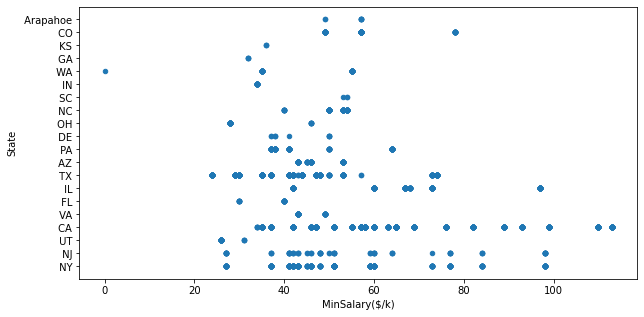

In [32]:
df.plot.scatter(x='MinSalary($/k)', y='State',figsize=(10,5))

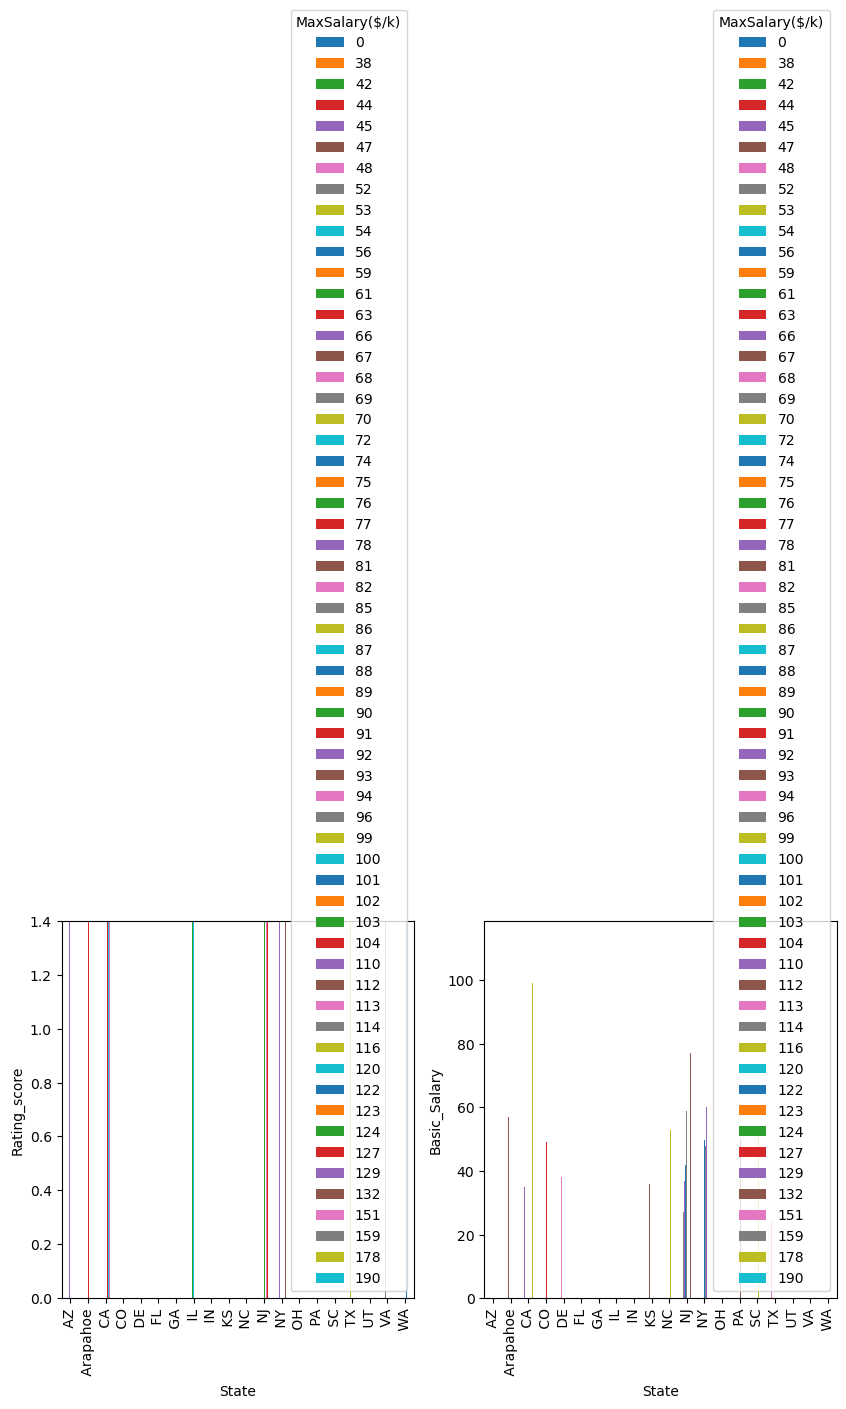

In [33]:
f,axes= plt.subplots(1,2, sharey=False, figsize=(10,5), dpi=100, facecolor= 'white')

table1= pd.pivot_table(df, index='State', columns='MaxSalary($/k)', values='Rating').plot(kind='bar', ax=axes[0])
table1= pd.pivot_table(df, index='State', columns='MaxSalary($/k)', values='MinSalary($/k)').plot(kind='bar', ax=axes[1])

axes[0].set_ylabel('Rating_score')
axes[1].set_ylabel('Basic_Salary')
axes[0].set_ylim((0,9.9))
axes[0].set_ylim((0,1.4));


In [34]:
df.sort_values(['Rating','MaxSalary($/k)'], ascending=(True, False), inplace= None)
df.head(10)

,Rating,Industry,Sector,MinSalary($/k),MaxSalary($/k),City,State,Job_Title
0,3.2,Social Assistance,Non-Profit,37,66,New York,NY,Data Analyst
1,3.8,Health Care Services & Hospitals,Health Care,37,66,New York,NY,Quality Data Analyst
2,3.4,Internet,Information Technology,37,66,New York,NY,Senior Data Analyst
3,4.1,IT Services,Information Technology,37,66,New York,NY,Data Analyst
4,3.9,Sports & Recreation,"Arts, Entertainment & Recreation",37,66,New York,NY,Reporting Data Analyst
5,3.9,Investment Banking & Asset Management,Finance,37,66,New York,NY,Data Analyst
6,4.4,Investment Banking & Asset Management,Finance,37,66,New York,NY,Business/Data Analyst (FP&A)
7,3.7,Insurance Carriers,Insurance,37,66,New York,NY,Data Science Analyst
8,4.0,Venture Capital & Private Equity,Finance,37,66,New York,NY,Data Analyst
9,4.4,Research & Development,Business Services,37,66,New York,NY,Data Analyst


In [35]:
### Univarient Analysis

In [36]:
df.groupby(['Job_Title']).count()

,Rating,Industry,Sector,MinSalary($/k),MaxSalary($/k),City,State
Job_Title,,,,,,,
(REMOTE) Sr. Risk Analyst (IT,1,1,1,1,1,1,1
+ Global Process Data Analyst,1,1,1,1,1,1,1
19-0574,1,1,1,1,1,1,1
19-84R Team Lead (Data Analyst IV),1,1,1,1,1,1,1
20-63 Flood Planning Data Analyst (Data Analyst III),1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
a. Senior Data and Business Analyst,1,1,1,1,1,1,1
eCommerce Data Analyst,1,1,1,1,1,1,1
eDiscovery Data Analyst,1,1,1,1,1,1,1


In [37]:
freq_table= df.groupby(['Job_Title']).size().reset_index(name='Count')
freq_table.head()

,Job_Title,Count
0,(REMOTE) Sr. Risk Analyst (IT,1
1,+ Global Process Data Analyst,1
2,19-0574,1
3,19-84R Team Lead (Data Analyst IV),1
4,20-63 Flood Planning Data Analyst (Data Analys...,1


In [38]:
freq_table['Counts']=freq_table['Count']/sum(freq_table['Count'])*100
freq_table

,Job_Title,Count,Counts
0,(REMOTE) Sr. Risk Analyst (IT,1,0.044385
1,+ Global Process Data Analyst,1,0.044385
2,19-0574,1,0.044385
3,19-84R Team Lead (Data Analyst IV),1,0.044385
4,20-63 Flood Planning Data Analyst (Data Analys...,1,0.044385
...,...,...,...
993,a. Senior Data and Business Analyst,1,0.044385
994,eCommerce Data Analyst,1,0.044385
995,eDiscovery Data Analyst,1,0.044385
996,"{""title"":""GAO Analyst (Data Analysis)"",""extend...",1,0.044385


In [39]:
freq_table= df.groupby(['Rating']).size().reset_index(name='Count')
freq_table.head(10)

,Rating,Count
0,-1.0,272
1,1.0,10
2,1.6,2
3,1.7,2
4,1.8,2
5,1.9,2
6,2.0,6
7,2.1,4
8,2.2,3
9,2.3,9


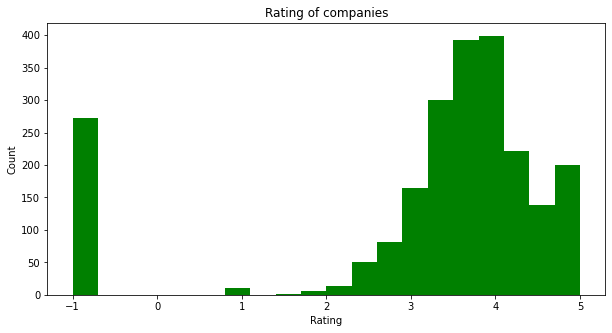

In [40]:
plt.figure(figsize=(10,5))
x = df['Rating']
plt.hist(x, bins=20, color='green')
plt.title('Rating of companies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


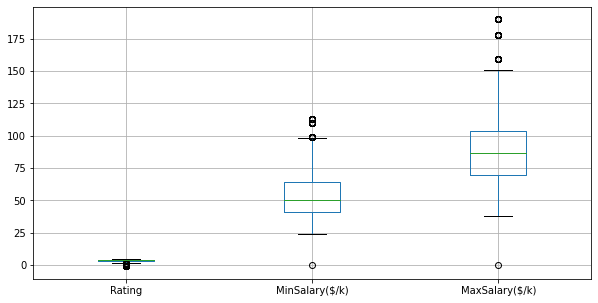

In [41]:
plt.figure(figsize=(10,5))
df.boxplot()

In [42]:
df['MinSalary($/k)'].median()

50.0

In [43]:
np.percentile(df['MaxSalary($/k)'],75)

104.0